In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/A_Z Handwritten Data.csv'
data = pd.read_csv(file_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [5]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [6]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


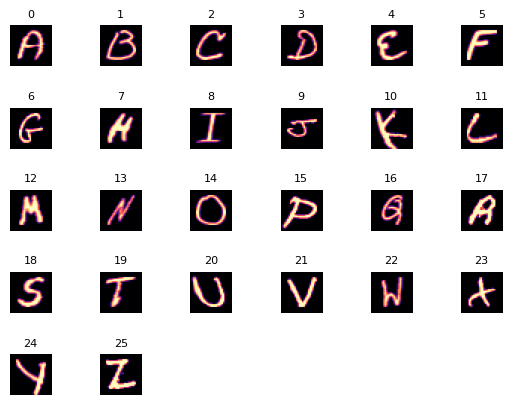

In [7]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the images
for i in range(26):
    dd = data[data['0'] == i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    ax = plt.subplot(5, 6, i+1)
    ax.imshow(x, cmap='magma')
    ax.axis('off')
    ax.set_title(str(i), fontsize=8)

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

In [8]:
def detect_identical_borders(vect_image, dim):
    np_image = np.reshape(vect_image, dim)
    height, width = np_image.shape
    tolerance = 100

    top_border = np.where(~np.all(np.isclose(np_image[0], np_image, atol=tolerance), axis=1))[0][0]

    bottom_border = np.where(~np.all(np.isclose(np_image[height - 1], np_image, atol=tolerance), axis=1))[0][-1]

    left_border = np.where(~np.all(np.isclose(np_image[:, 0], np_image, atol=tolerance), axis=0))[0][0]

    right_border = np.where(~np.all(np.isclose(np_image[:, width - 1], np_image, atol=tolerance), axis=0))[0][-1]

    return [left_border, top_border, right_border, bottom_border]

In [9]:
borders = np.apply_along_axis(detect_identical_borders, 1, data.iloc[:, 1:].values, (28, 28))
mean_borders = np.mean(borders, axis=0).astype(int)
mean_borders

array([ 4,  4, 22, 22])

In [10]:
data.shape

(372450, 785)

In [11]:
data_array = data.to_numpy()

matrix = np.reshape(data_array[:, 1:], (data_array.shape[0], 28, 28))

cropped_matrix = matrix[:, mean_borders[1]:mean_borders[3]+1, mean_borders[0]:mean_borders[2]+1]

for i, cm in enumerate(cropped_matrix):
    im = Image.fromarray(cm.astype(np.uint8))
    im = im.filter(ImageFilter.SMOOTH)
    cropped_matrix[i] = np.array(im)

cropped_vectors = np.reshape(cropped_matrix, (cropped_matrix.shape[0], -1))

data2 = np.column_stack((data_array[:, 0], cropped_vectors))


data2.shape

(372450, 362)

In [12]:
data2 = pd.DataFrame(data2, columns=None)

In [13]:
data2.shape

(372450, 362)

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 362 entries, 0 to 361
dtypes: int64(362)
memory usage: 1.0 GB


In [15]:
data2.describe()

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
count,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,2.680609,5.693919,8.009271,10.528734,13.598070,17.381686,22.336155,28.563109,35.960234,...,109.804197,103.170681,94.676622,84.064575,71.977095,59.034552,45.753435,33.214096,22.295076,13.045496
std,6.740824,20.452091,31.501142,36.394227,41.315288,46.294017,51.770934,58.140098,65.169357,72.540293,...,115.552620,113.398871,110.341752,106.261346,100.927705,94.094170,85.352608,74.805416,62.754942,48.958495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,47.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,255.000000,248.000000,230.000000,208.000000,164.000000,107.000000,38.000000,0.000000,0.000000,0.000000
max,25.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [16]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,0,0,0,0,0,0,0,0,0,0,...,0,0,152,255,255,89,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,81,204,149,15,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,80,180,101,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,85,244,255,184


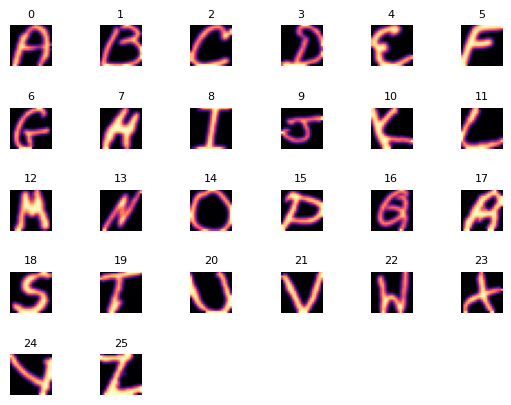

In [17]:
import matplotlib.pyplot as plt

# Assuming 'data2' is your new DataFrame containing the images
for i in range(26):
    dd = data2[data2[0] == i].iloc[1]
    x = dd[1:].values
    x = x.reshape((19, 19))
    ax = plt.subplot(5, 6, i+1)
    ax.imshow(x, cmap='magma')
    ax.axis('off')
    ax.set_title(str(i), fontsize=8)

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

In [18]:
X = data2.iloc[:, 1:].values
y = data2.iloc[:, 0].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

classifier.fit(X_train, y_train)

accuracy = classifier.score(X_test, y_test)

print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.989


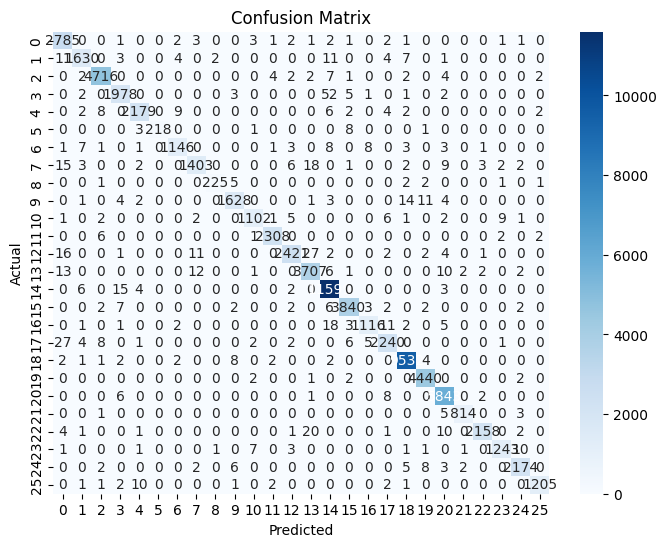

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

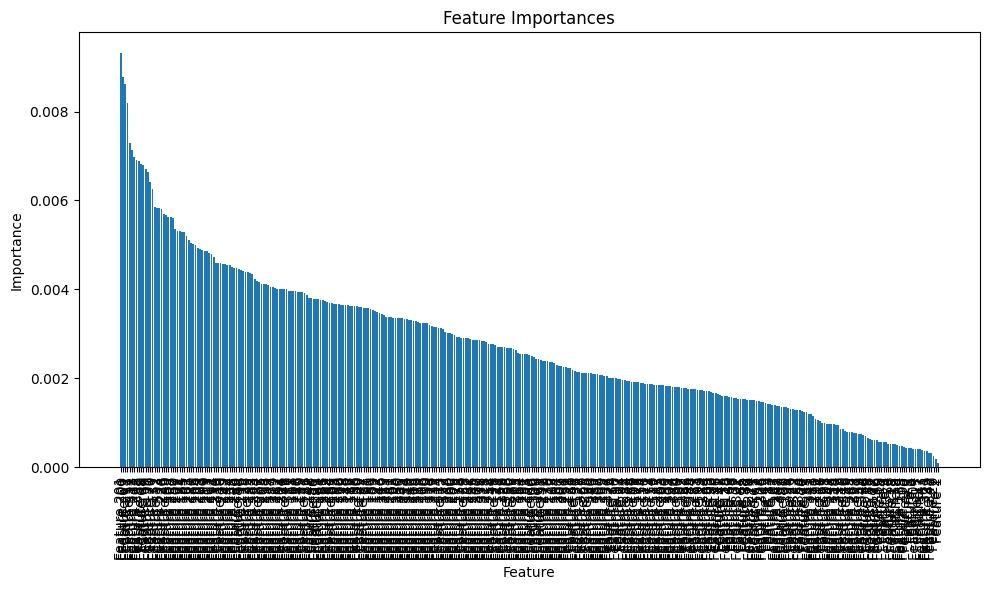

In [23]:
importances = classifier.feature_importances_

feature_names = [f"Feature {i+1}" for i in range(len(importances))]

sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()